#Proyecto Integrador Data Analytics

## **1.Introduccion**

Los siniestros viales, también conocidos como accidentes de tráfico o accidentes de tránsito,es un hecho que se da en la vía pública y puede involucrar a uno o más vehículos, causando daños materiales e incluso heridos o pérdidas humanas.estos pueden tener diversas causas tales como colisiones entre automóviles, motocicletas, bicicletas o peatones, atropellos, choques con objetos fijos o caídas de vehículos.

Siempre existe una causa desencadenante que produce el incidente, que se puede agravar si por él resultan afectadas tanto como la misma como otras personas, . Asimismo, un accidente puede convertirse facilmente en una tragedia si no se maneja de manera adecuada , el hacer uso adecuado de los medios preventivos que no lo evitan pero reducirían su gravedad.Un claro  ejemplo seria no llevar ajustado el cinturón de seguridad o no llevar puesto el casco si se conduce una motocicleta o bicicleta.

En una ciudad como Buenos Aires con mucho tráfico y alta densidad de población, los accidentes de tránsito pueden ser un gran problema. Estos eventos pueden afectar significativamente la seguridad de los residentes y visitantes de la ciudad, así como la infraestructura vial y los servicios operativos.

La cantidad de muertes por accidentes de tráfico es una medida importante de la seguridad vial en un área. Estas tasas se calculan dividiendo el número de muertes por el número de habitantes o de vehículos registrados. Reducir estas tasas es un objetivo clave para mejorar la seguridad vial y proteger las vidas de las personas en la ciudad.

La prevención de accidentes de tráfico es importante y requiere un enfoque integral que incluya educación vial, cumplimiento de las normas de tráfico, infraestructura segura y vehículos seguros. Además, es necesario recopilar datos y aplicar políticas efectivas para abordar este problema adecuadamente.

Un accidente de tránsito es un evento que ocurre en la vía pública y puede involucrar a uno o más vehículos. Estos accidentes pueden causar daños materiales, así como heridos o incluso muertes.

* **Contexto de Negocio :**
El `Observatorio de Movilidad y Seguridad Vial` (OMSV), centro de estudios que se encuentra bajo la órbita de la ***Secretaría de Transporte*** del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.
btenidos de la pagina de Datos Publicos del Gobierno de la Ciudad de Buenos Aires

Por su parte, en la sección **Material de apoyo** podrán encontrar más información de interés relativa a los datos disponibilizados y al Observatorio que nos encomienda el trabajo.





## **2.Cargando las librerías necesarias**

In [14]:
import pandas as pd #Cargaremos pandas para manejar los datos",
import numpy as np #Cargaremos numpy para manejar los datos,
import datetime #Para obtener la fecha
import matplotlib.pyplot as plt  #Cargaremos matplotlib para graficar",
import seaborn as sns  #Cargaremos seaborn para graficar",

In [6]:
from google.colab import drive #Cargaremos google drive

drive.mount('/content/drive')

Mounted at /content/drive


## **3.Carga de Datos**

Cargaremos inicialmente los 2 archivos extraidos de los [Datos Publicos del Gobierno De La Ciudad De Buenos Aires](https://data.buenosaires.gob.ar/dataset/victimas-siniestros-viales) del DataSet de **Siniestros Viales** donde extraeremos estos archivos :
- •Lesiones.xlsx
- •Homicidios .xlsx

In [ ]:
url01="/content/drive/MyDrive/2023/Henry/PI02-DataAnalyst/Datos/homicidios.xlsx"
url02="/content/drive/MyDrive/2023/Henry/PI02-DataAnalyst/Datos/lesiones.xlsx"


Al revisar la informacion previamente notamos que el archivo **Homicidios** tiene varias pestañas nominadas

In [ ]:
df_homicidios_hechos=pd.read_excel(url01,sheet_name="HECHOS")
df_homicidios_victimas=pd.read_excel(url01,sheet_name="VICTIMAS")
df_lesiones_hechos=pd.read_excel(url02,sheet_name="HECHOS")
df_lesiones_victimas=pd.read_excel(url02,sheet_name="VICTIMAS")

In [ ]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [ ]:
df_homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [ ]:
df_lesiones_hechos.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [ ]:
df_lesiones_victimas.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


## **4. ETL de los datos**

La transformacion se desarrollo en un notebook aparte por tanto los archivos de salida son los siguientes con sus respectivos enlaces a su ETL:
*  Homicidios_hechos
[Homicidios_Hechos.ipynb](https://github.com/AlisterVento/PI02-DataAnalyst/blob/main/Homicidios_Hechos.ipynb)
* Homicidios_victimas
[Homicidios_Victimas.ipynb](https://github.com/AlisterVento/PI02-DataAnalyst/blob/main/Homicidios_Victimas.ipynb)
* Lesiones_hechos
[Lesiones_Hechos.ipynb](https://github.com/AlisterVento/PI02-DataAnalyst/blob/main/Lesiones_Hechos.ipynb)
- Lesiones_victimas
[Lesiones_Victimas.ipynb](https://github.com/AlisterVento/PI02-DataAnalyst/blob/main/Lesiones_Victimas.ipynb)

Dandonos como resultado los siguientes archivos:
* homicidios_hechos.parquet.gzip
* homicidios_victimas.parquet.gzip
* lesiones_hechos.parquet.gzip
* lesiones_victimas.parquet.gzip

In [101]:
path_homicidios_hechos=r'/content/drive/MyDrive/2023/Henry/PI02-DataAnalyst/Data_Clean/homicidios_hechos.parquet.gzip'
path_homicidios_victimas=r'/content/drive/MyDrive/2023/Henry/PI02-DataAnalyst/Data_Clean/homicidios_victimas.parquet.gzip'
path_lesiones_hechos=r'/content/drive/MyDrive/2023/Henry/PI02-DataAnalyst/Data_Clean/lesiones_hechos.parquet.gzip'
path_lesiones_victimas=r'/content/drive/MyDrive/2023/Henry/PI02-DataAnalyst/Data_Clean/lesiones_victimas.parquet.gzip'

In [102]:
df_homicidios_hechos = pd.read_parquet(path_homicidios_hechos)
df_homicidios_victimas = pd.read_parquet(path_homicidios_victimas)
df_lesiones_hechos = pd.read_parquet(path_lesiones_hechos)
df_lesiones_victimas = pd.read_parquet(path_lesiones_victimas)

## **5. Analisis Exploratorio de los datos**

### 5.1.EDA de homicidios_hechos

In [103]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION NORMALIZADA,COMUNA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,AV. PIEDRA BUENA,AV. GENERAL F. FERNANDEZ DE LA CRUZ,AV. PIEDRA BUENA Y AV. GENERAL F. FERNANDEZ DE...,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GENERAL PAZ,AV. GENERAL PAZ,AV. DE LOS CORRALES,AV. GENERAL PAZ Y AV. DE LOS CORRALES,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,AV. ENTRE RIOS,,AV. ENTRE RIOS,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,AV. LARRAZABAL,,AV. LARRAZABAL,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,AV. SAN JUAN,,AV. SAN JUAN,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


**Variables**:
* **ID**: Variable de tipo categorico usado como identificador unico del siniestro
* **N_VICTIMAS**: Variable de tipo numerica que contiene la cantidad de víctimas
* **FECHA**: Variable de tipo numerica que contiene la fecha del siniestro
* **AAAA**: Variable de tipo numerica que contiene el año de la fecha del siniestro
* **MM**: Variable de tipo numerica que contiene el mes de la fecha del siniestro
* **DD**: Variable de tipo numerica que contiene el dia de la fecha del siniestro
* **HH**: Variable de tipo numerica que contiene la hora de formato 24hrs de la fecha del siniestro
* **TIPO_DE_CALLE**: Variable de tipo categorica clasificada en Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía
* **CALLE**: Variable de tipo categorica clasificada que contiene el nombre de la arteria donde se produjo el hecho
* **CRUCE**: Variable de tipo categorica clasificada que contiene el cruce en caso de que sea una encrucijada
* **DIRECCION_NORMALIZADA**: Variable de tipo categorica que contiene la dirección normalizada
* **COMUNA**: Variable de tipo numerica que contiene la Comuna de la ciudad (1 a 15)
* **LONGITUD**: Variable de tipo numerica que contiene la longitud con separador punto. WGS84
* **LATITUD**: Variable de tipo numerica que contiene latitud con separador punto. WGS84
* **PARTICIPANTES**: Variable de tipo categorica que contiene la conjunción de víctima y acusado
* **VICTIMAS**: Variable de tipo categorica que contiene el vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
* **ACUSADO**: Variable de tipo categorica que contiene el Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal


**Pregunta 1:¿En que año se presentaron mayor numero de victimas?**

In [104]:
victimas_per_year=df_homicidios_hechos['N_VICTIMAS'].groupby(df_homicidios_hechos['AAAA']).sum()
index=victimas_per_year.index

In [105]:
victimas_per_year

AAAA
2016    146
2017    140
2018    149
2019    104
2020     81
2021     97
Name: N_VICTIMAS, dtype: int64

Text(0.5, 1.0, 'Numero de Victimas por Año')

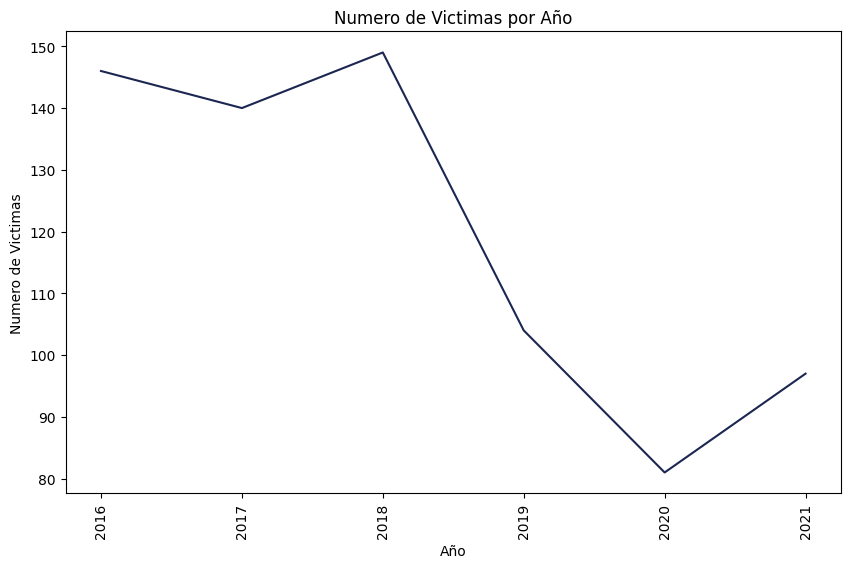

In [106]:
# Grafica lineal de  cantidad de victimas por año
plt.figure(figsize=(10, 6))
plt.plot(index, victimas_per_year, color='#1b2651')
plt.xticks(rotation='vertical')

# Indicar las etiquetas y el titulo
plt.xlabel('Año')
plt.ylabel('Numero de Victimas')
plt.title('Numero de Victimas por Año')

**Conclusion**:
* Podemos concluir que el mayor numero de victimas se presentaron en el año 2018 con un total de 149 victimas

**Pregunta 2:¿Cual es considerada la hora con mayor numero de victimas y con la mayor cantidad de incidentes?**

In [107]:
Hora_victimas=df_homicidios_hechos[['HH','N_VICTIMAS','COMUNA']].copy()

In [108]:
Hora_victimas['HORARIO']=Hora_victimas['HH'].apply(lambda x: 'MADRUGADA' if x<=6 else ('MAÑANA' if x>6 and x<=12 else ('TARDE') if x>12 and x<=18 else 'NOCHE'))

In [109]:
Hora_victimas

,HH,N_VICTIMAS,COMUNA,HORARIO
0,4,1,8,MADRUGADA
1,1,1,9,MADRUGADA
2,7,1,1,MAÑANA
3,0,1,8,MADRUGADA
4,5,1,1,MADRUGADA
...,...,...,...,...
691,17,1,7,TARDE
692,1,1,9,MADRUGADA
693,0,1,11,MADRUGADA
694,10,1,9,MAÑANA


In [110]:
Hora_victimas['HORARIO'].value_counts()

MAÑANA      199
MADRUGADA    188
TARDE        166
NOCHE        143
Name: HORARIO, dtype: int64

Text(0.5, 1.0, 'Histograma de cantidad de insidentes por hora')

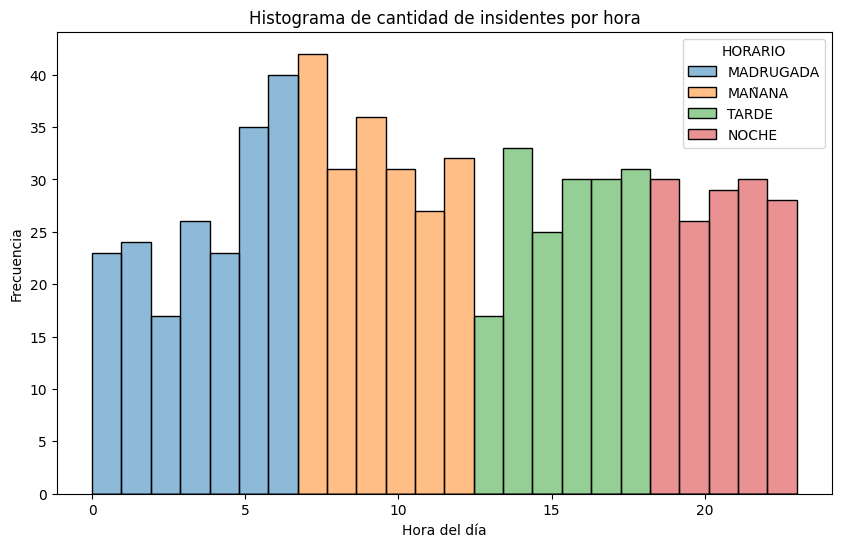

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(x='HH', data=Hora_victimas,bins=24,hue='HORARIO')
plt.xlabel('Hora del día')  # Agrega el nombre del eje x
plt.ylabel('Frecuencia')  # Agrega el nombre del eje y
plt.title('Histograma de cantidad de insidentes por hora')  # Agrega el titulo



**Conclusion**:
* Podemos concluir que el mayor numero de incidentes se presentaron en la madrugada con un total de 199 incidentes sin embargo la hora con mayor numero de incidentes fue a las **7:00 am** teniendo un numero de incidentes con un total de 42,esto podria tener mucho sentido porque es la hora punta de la mañana

**Pregunta 3:¿Cuales son los 3 principales medios que generan mayor cantidad de homicidios y cuales son los 3 principales victimas?**

In [112]:
victimas_Acusado=df_homicidios_hechos[['VICTIMA','ACUSADO']].copy()

In [113]:
df_victimas_Acusado=pd.DataFrame({'ACUSADO':victimas_Acusado['ACUSADO'].value_counts(),'VICTIMA':victimas_Acusado['VICTIMA'].value_counts()})

In [114]:
df_victimas_Acusado

,ACUSADO,VICTIMA
AUTO,204.0,83.0
BICICLETA,7.0,29.0
CARGAS,146.0,7.0
MOTO,57.0,295.0
MOVIL,NaN,2.0
MULTIPLE,17.0,NaN
OBJETO FIJO,62.0,1.0
OTRO,6.0,NaN
PASAJEROS,173.0,5.0
PEATON,NaN,264.0


In [115]:
participantes=pd.DataFrame(df_homicidios_hechos['PARTICIPANTES'].value_counts())[0:10]

In [116]:
participantes

,PARTICIPANTES
PEATON-PASAJEROS,105
MOTO-AUTO,83
MOTO-CARGAS,78
PEATON-AUTO,77
MOTO-PASAJEROS,46
MOTO-OBJETO FIJO,40
PEATON-CARGAS,38
AUTO-AUTO,31
PEATON-MOTO,30
MOTO-MOTO,25


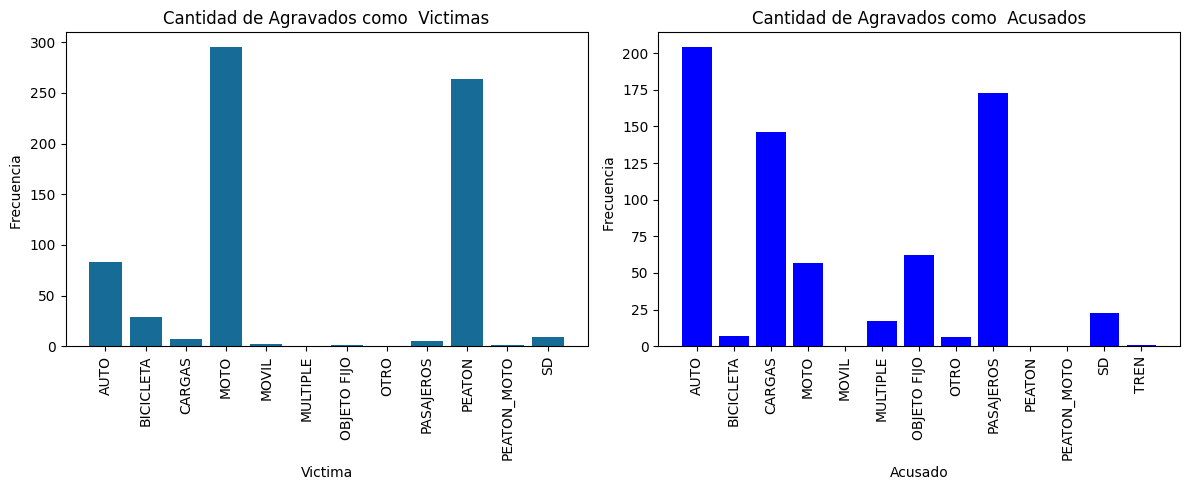

In [117]:
# Crear una figura y dos subplots en una sola fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar cantidad ventas anuales
ax1.bar(df_victimas_Acusado.index, df_victimas_Acusado['VICTIMA'],label=df_victimas_Acusado.index, color='#166c96')

ax1.set_xlabel('Victima')
ax1.set_ylabel('Frecuencia ')
ax1.set_title('Cantidad de Agravados como  Victimas')
ax1.tick_params(axis='x', rotation=90)


ax2.bar(df_victimas_Acusado.index, df_victimas_Acusado['ACUSADO'],label=df_victimas_Acusado.index, color='b')
# Graficar suma de ventas anuales

ax2.set_xlabel('Acusado')
ax2.set_ylabel('Frecuencia  ')
ax2.set_title('Cantidad de Agravados como  Acusados')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


<Axes: xlabel='PARTICIPANTES'>

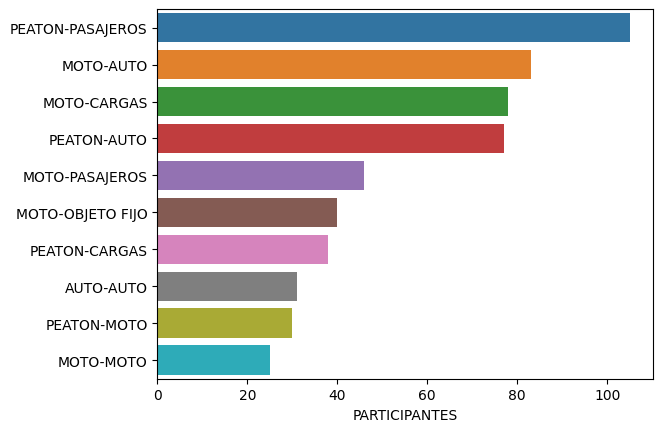

In [118]:
sns.barplot(participantes , y= participantes.index , x = 'PARTICIPANTES')

**Conclusion**:
* Podemos concluir que el mayor numero de victimas fueron motos y el mayor numero de acusados fueron autos sin embargo en la sigueinte grafica se deduce que los participaes en los homicidios fueron peaton-pasajeros

### 5.2.EDA de Homicidios_victimas

In [119]:
df_homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,None
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01


**Variables**:
* **ID_hecho**: Variable de tipo categorico usado como identificador unico del siniestro
* **FECHA**: Variable de tipo numerica que contiene la fecha del siniestro
* **AAAA**: Variable de tipo numerica que contiene el año de la fecha del siniestro
* **MM**: Variable de tipo numerica que contiene el mes de la fecha del siniestro
* **DD**: Variable de tipo numerica que contiene el dia de la fecha del siniestro
* **HH**: Variable de tipo numerica que contiene la hora de formato 24hrs de la fecha del siniestro
* **ROL** :Variable de tipo categorica que contiene la Posición relativa al vehículo que presentaba la víctima en el momento del siniestro.
* **VICTIMAS**: Variable de tipo categorica que contiene el vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
* **SEXO**: Variable de tipo categorica que contiene el sexo de la victima
* **EDAD**: Variable de tipo numerica que contiene la edad de la victima al momento del siniestro
* **FECHA_FALLECIMIENTO**: Variable de tipo numerica que contiene la Fecha de fallecimiento de la víctima

**Pregunta 4:¿Respecto a las victimas de los homicidios viales usualmente quien es la persona que fallece?**

In [120]:
rol_victimas=pd.DataFrame(df_homicidios_victimas['ROL'].value_counts())
rol_victimas

,ROL
CONDUCTOR,330
PEATON,267
PASAJERO_ACOMPAÑANTE,80
CICLISTA,29


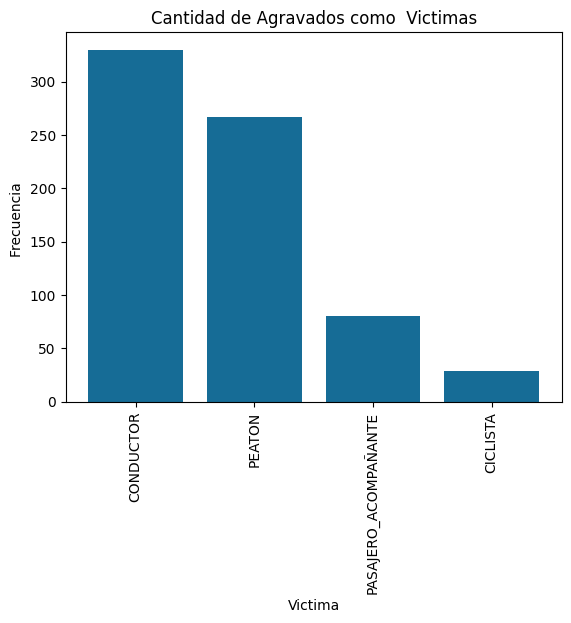

In [121]:
plt.bar(rol_victimas.index, rol_victimas['ROL'],label=rol_victimas.index, color='#166c96')

plt.xlabel('Victima')
plt.ylabel('Frecuencia ')
plt.title('Cantidad de Agravados como  Victimas')
plt.tick_params(axis='x', rotation=90)

**Conclusion**:
* Tras observar esta grafica podemos concluir que la persona que fallece es la persona que conducia el vehículo en el momento del siniestro seguido por los peatones

**Pregunta 5:¿Cual es la edad promedio de las víctimas de los homicidios segun su genero?**

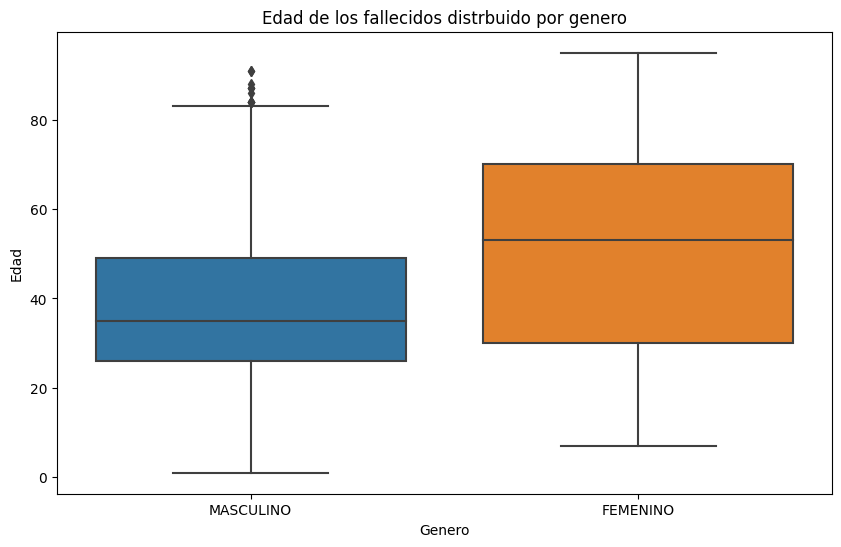

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='EDAD',x='SEXO', data=df_homicidios_victimas, orient='vertical')
plt.xlabel('Genero')  # Agrega el nombre del eje x
plt.ylabel('Edad')  # Agrega el nombre del eje y
plt.title('Edad de los fallecidos distrbuido por genero')  # Agrega el titulo

plt.show()

**Conclusion**:
* La mediana edad para las victimas de genero **MASCULINO** esta cerca a los 40 años sin embarcgo para las victimas de genero **FEMENINO** esta por encima de los 50 años

**Pregunta 6:¿Cual es el tiempo de agonia de las víctimas de los homicidios?**

In [130]:
df_homicidios_victimas['FECHA_FALLECIMIENTO']=pd.to_datetime(df_homicidios_victimas['FECHA_FALLECIMIENTO'],format='%Y-%m-%d',errors='coerce')

In [134]:
df_homicidios_victimas['TIEMPO']=df_homicidios_victimas.apply(lambda columna:(columna['FECHA_FALLECIMIENTO']-columna['FECHA']).days
                      if isinstance(columna['FECHA_FALLECIMIENTO'],datetime.datetime) and isinstance(columna['FECHA'],datetime.datetime)
                       else float('NaN'), axis=1)

In [135]:
df_homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,TIEMPO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,0.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,0.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,0.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,NaT,NaN
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,11.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50.0,2021-12-12,0.0
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18,5.0
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20,0.0
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02,3.0


Text(0.5, 1.0, 'Histograma de dias de agonia por genero')

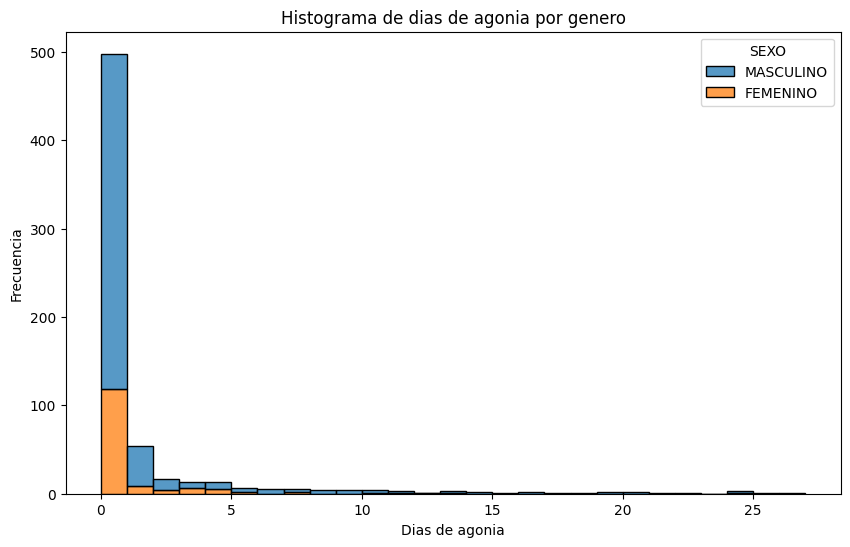

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(x='TIEMPO', data=df_homicidios_victimas,hue='SEXO',multiple="stack",binwidth=1)
plt.xlabel('Dias de agonia')  # Agrega el nombre del eje x
plt.ylabel('Frecuencia')  # Agrega el nombre del eje y
plt.title('Histograma de dias de agonia por genero')  # Agrega el titulo



**Conclusion**:
* La mayoria de las victimas no sobreviven el primer dia :/

### 5.3.EDA de Lesiones_hechos

In [125]:
df_lesiones_hechos.head()

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,HORA,HH,DIRECCION NORMALIZADA,COMUNA,...,LONGITUD,LATITUD,VICTIMA,ACUSADO,MOTO,AUTO,TRANSPORTE_PUBLICO,CAMION,CICLISTA,GRAVEDAD
0,LC-2019-0000179,1,2019,1,1,2019-01-01,09:00:00,9,"OBLIGADO RAFAEL, AV.COSTANERA 3300, BARRIO: PA...",14,...,-58.408911,-34.559658,CICLISTA,None,NaN,NaN,NaN,NaN,1.0,None
1,LC-2019-0000053,1,2019,1,1,2019-01-01,01:55:00,1,"AUTOPISTA PRESIDENTE HÉCTOR J. CÁMPORA Y ROCA,...",8,...,-58.44351,-34.669125,AUTO,None,NaN,1.0,NaN,NaN,NaN,None
2,LC-2019-0000063,1,2019,1,1,2019-01-01,02:00:00,2,"BARROS PAZOS, JOSE Y LARRAYA 0, BARRIO: VILLA ...",8,...,-58.468335,-34.677556,None,None,NaN,NaN,NaN,NaN,NaN,None
3,LC-2019-0000079,1,2019,1,1,2019-01-01,02:30:00,2,"TORRES Y TENORIO, PRES. Y RIESTRA AV. 0, BARRI...",7,...,-58.437425,-34.647349,PEATON,None,1.0,NaN,NaN,NaN,NaN,None
4,LC-2019-0000082,4,2019,1,1,2019-01-01,04:30:00,4,"CORRIENTES AV. Y URIBURU JOSE E., PRES. 0, BAR...",3,...,-58.398225,-34.604579,AUTO,None,NaN,NaN,1.0,NaN,NaN,None


**Variables**:
* **ID**: Variable de tipo categorico usado como identificador unico del siniestro
* **N_VICTIMAS**: Variable de tipo numerica que contiene la cantidad de víctimas
* **FECHA**: Variable de tipo numerica que contiene la fecha del siniestro
* **AAAA**: Variable de tipo numerica que contiene el año de la fecha del siniestro
* **MM**: Variable de tipo numerica que contiene el mes de la fecha del siniestro
* **DD**: Variable de tipo numerica que contiene el dia de la fecha del siniestro
* **HH**: Variable de tipo numerica que contiene la hora de formato 24hrs de la fecha del siniestro
* **TIPO_DE_CALLE**: Variable de tipo categorica clasificada en Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía
* **CALLE**: Variable de tipo categorica clasificada que contiene el nombre de la arteria donde se produjo el hecho
* **CRUCE**: Variable de tipo categorica clasificada que contiene el cruce en caso de que sea una encrucijada
* **DIRECCION_NORMALIZADA**: Variable de tipo categorica que contiene la dirección normalizada
* **COMUNA**: Variable de tipo numerica que contiene la Comuna de la ciudad (1 a 15)
* **LONGITUD**: Variable de tipo numerica que contiene la longitud con separador punto. WGS84
* **LATITUD**: Variable de tipo numerica que contiene latitud con separador punto. WGS84
* **PARTICIPANTES**: Variable de tipo categorica que contiene la conjunción de víctima y acusado
* **VICTIMAS**: Variable de tipo categorica que contiene el vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
* **ACUSADO**: Variable de tipo categorica que contiene el Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal

**Pregunta 7:¿En que año se presentaron mayor numero de lesiones?**

In [143]:
lesiones_per_year=df_lesiones_hechos['N_VICTIMAS'].groupby(df_lesiones_hechos['AAAA']).sum()
index=lesiones_per_year.index

In [144]:
lesiones_per_year

AAAA
2019    10997
2020     6561
2021     8386
Name: N_VICTIMAS, dtype: int64

Text(0.5, 1.0, 'Numero de Victimas por Año')

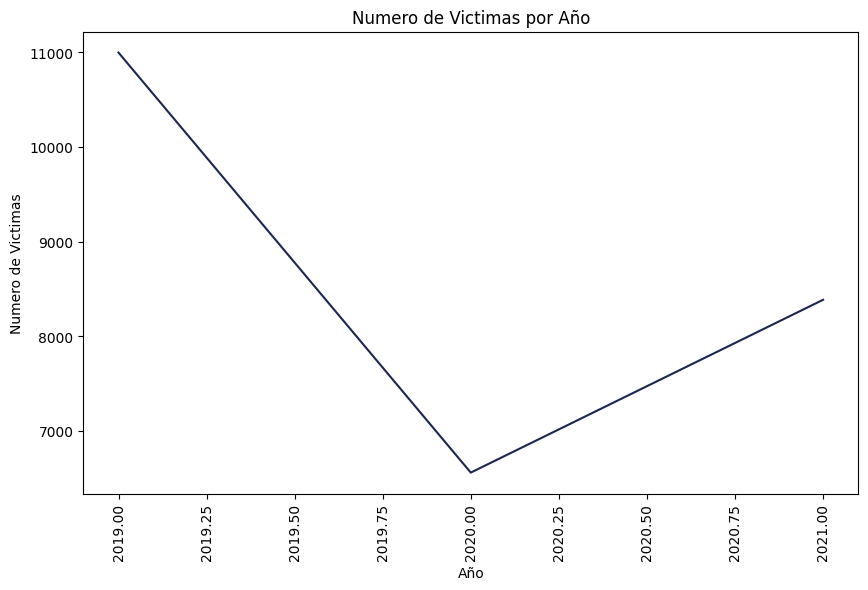

In [145]:
# Grafica lineal de  cantidad de victimas por año
plt.figure(figsize=(10, 6))
plt.plot(index, lesiones_per_year, color='#1b2651')
plt.xticks(rotation='vertical')

# Indicar las etiquetas y el titulo
plt.xlabel('Año')
plt.ylabel('Numero de Victimas')
plt.title('Numero de Victimas por Año')

**Conclusion**:
* La mayor cantidad de lesionados se presentaron en el 2019,sin embargo a diferencia de la data de homicidios unicamente  tiene años desde 2019 al 2021

**Pregunta 8:¿Cual es la comuna con mayor cantidad de lesiones?**

In [152]:
comuna=pd.DataFrame(df_lesiones_hechos['COMUNA'].value_counts())[0:10]
comuna

,COMUNA
1,2506
15,1901
4,1728
3,1714
9,1670
14,1577
7,1497
12,1436
11,1411
13,1351


<Axes: xlabel='COMUNA'>

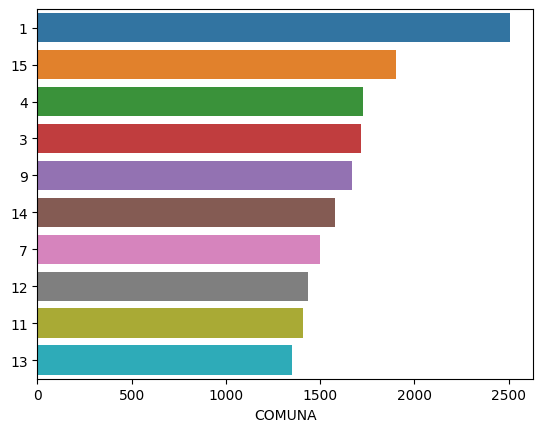

In [153]:
sns.barplot(comuna, y= comuna.index , x = 'COMUNA')

**Conclusion**:
* Se observa que a diferencia de las otras comunas la comuna con mayor cantidad de lesiones se presenta en la comuna 1

### 5.4.EDA de Lesiones_victimas

In [128]:
df_lesiones_victimas.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,None,VARON,57.0,None
1,LC-2019-0000063,2019,1,1,2019-01-01,None,None,NaN,None
2,LC-2019-0000079,2019,1,1,2019-01-01,None,VARON,NaN,None
3,LC-2019-0000082,2019,1,1,2019-01-01,None,VARON,45.0,None
4,LC-2019-0000082,2019,1,1,2019-01-01,None,MUJER,45.0,None


**Variables**:
* **ID_hecho**: Variable de tipo categorico usado como identificador unico del siniestro
* **FECHA**: Variable de tipo numerica que contiene la fecha del siniestro
* **AAAA**: Variable de tipo numerica que contiene el año de la fecha del siniestro
* **MM**: Variable de tipo numerica que contiene el mes de la fecha del siniestro
* **DD**: Variable de tipo numerica que contiene el dia de la fecha del siniestro
* **HH**: Variable de tipo numerica que contiene la hora de formato 24hrs de la fecha del siniestro
* **ROL** :Variable de tipo categorica que contiene la Posición relativa al vehículo que presentaba la víctima en el momento del siniestro.
* **VICTIMAS**: Variable de tipo categorica que contiene el vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
* **SEXO**: Variable de tipo categorica que contiene el sexo de la victima
* **EDAD**: Variable de tipo numerica que contiene la edad de la victima al momento del siniestro
* **FECHA_FALLECIMIENTO**: Variable de tipo numerica que contiene la Fecha de fallecimiento de la víctima

**Pregunta 9:¿Como es la distribución de las edades de los lesionados?**

In [168]:
df_lesiones_victimas['SEXO'].fillna('NO MENCIONA',inplace=True)

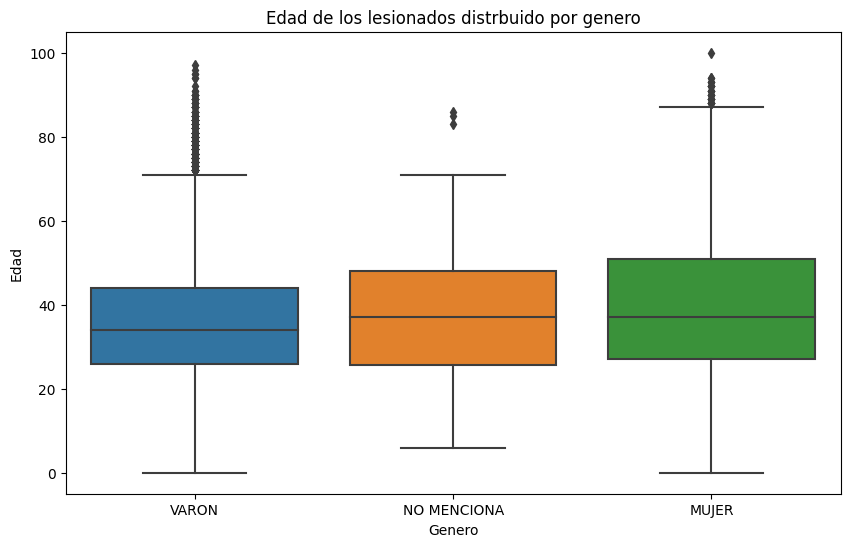

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='EDAD_VICTIMA',x='SEXO', data=df_lesiones_victimas, orient='vertical')
plt.xlabel('Genero')  # Agrega el nombre del eje x
plt.ylabel('Edad')  # Agrega el nombre del eje y
plt.title('Edad de los lesionados distrbuido por genero')  # Agrega el titulo

plt.show()

**Conclusion**:
* La mediana edad para las victimas de genero **MASCULINO** esta cerca a los 40 años ,las personas que no mencionaron su genero tambien se encuentra por los 40 años y para las victimas de genero **FEMENINO** esta por encima de la edad de los de genero masculino y quienes no mencionaron su genero pero menor a 40

**Pregunta 10:¿Cuales son la situacion de  los lesionados?**

In [165]:
df_lesiones_victimas['GRAVEDAD'].isnull().sum()

27068

In [166]:
df_lesiones_victimas['GRAVEDAD'].fillna('DESCONOCIDO',inplace=True)

Text(0.5, 1.0, 'Histograma de dias de agonia por genero')

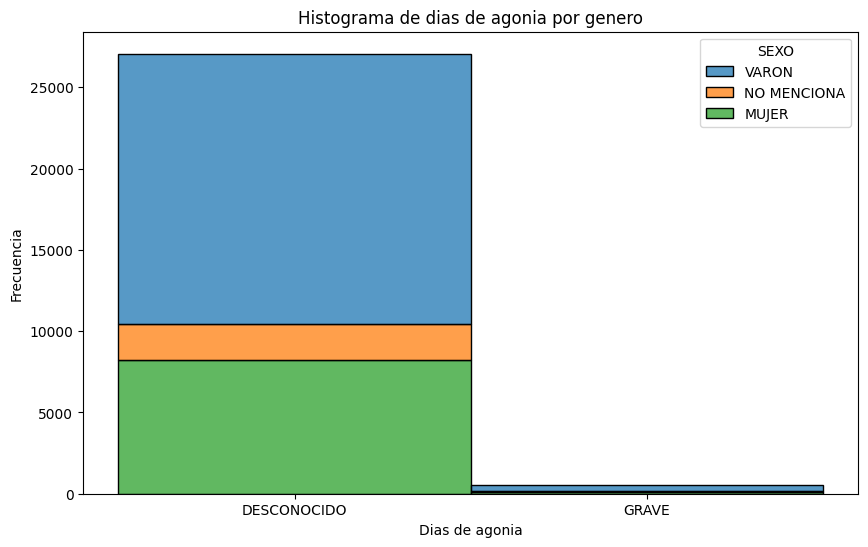

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(x='GRAVEDAD', data=df_lesiones_victimas,hue='SEXO',multiple="stack",binwidth=1)
plt.xlabel('Dias de agonia')  # Agrega el nombre del eje x
plt.ylabel('Frecuencia')  # Agrega el nombre del eje y
plt.title('Histograma de dias de agonia por genero')  # Agrega el titulo

**Conclusion**:
* el revisar esta informacion nos damos cuenta que en la mayoria de casos no se hace el seguimiento pertinente para saber el estado de los lesionados